### <i> Optimizing Online Sales Strategies in the USA Using ML Insights add_back_2302 </i>
### <i> Dataset Link --> https://www.kaggle.com/datasets/ytgangster/online-sales-in-usa </i>
### <i> Import Library Files </i>

In [1]:
import numpy as np
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

### <i> Load The Dataset </i>

In [2]:
data = pd.read_csv("sales.csv")
data

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286387,100562365,2021-09-30,paid,905179.0,APPCHA5AF14939B8F8A,2.0,4419.9,4419.9,0.0,4419.9,...,613-87-0361,212-772-7404,Rushville,Yates,Rushville,NY,14544,Northeast,bklatham,0.0
286388,100562376,2021-09-30,cod,905191.0,MEFCOT5A8D1E973B886,2.0,39.9,39.9,0.0,39.9,...,101-02-1040,229-817-9451,Lawrenceville,Gwinnett,Lawrenceville,GA,30044,South,bmbrunetti,0.0
286389,100562383,2021-09-30,cod,905200.0,WOFVAL59D5EA84167F9-M,2.0,40.0,40.0,0.0,40.0,...,399-31-7238,252-414-8396,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0
286390,100562384,2021-09-30,cod,905202.0,WOFNIG5B4D7EB0E9FDD-L,2.0,49.9,49.9,0.0,49.9,...,399-31-7238,252-414-8396,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0


### <i> Dataset Overview </i>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [4]:
data.describe()

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079
std,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100
min,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000
25%,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000
50%,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000
75%,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000
max,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000


### <i> Expolatory Data Analysis And Visulization </i>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

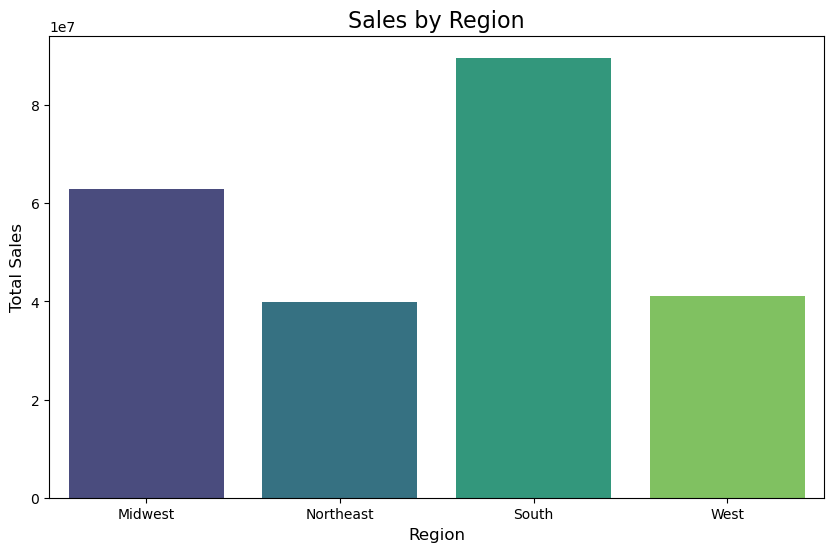

In [6]:
#  Sales by Region
sales_by_region = data.groupby('Region')['total'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_region, x='Region', y='total', palette='viridis')
plt.title('Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

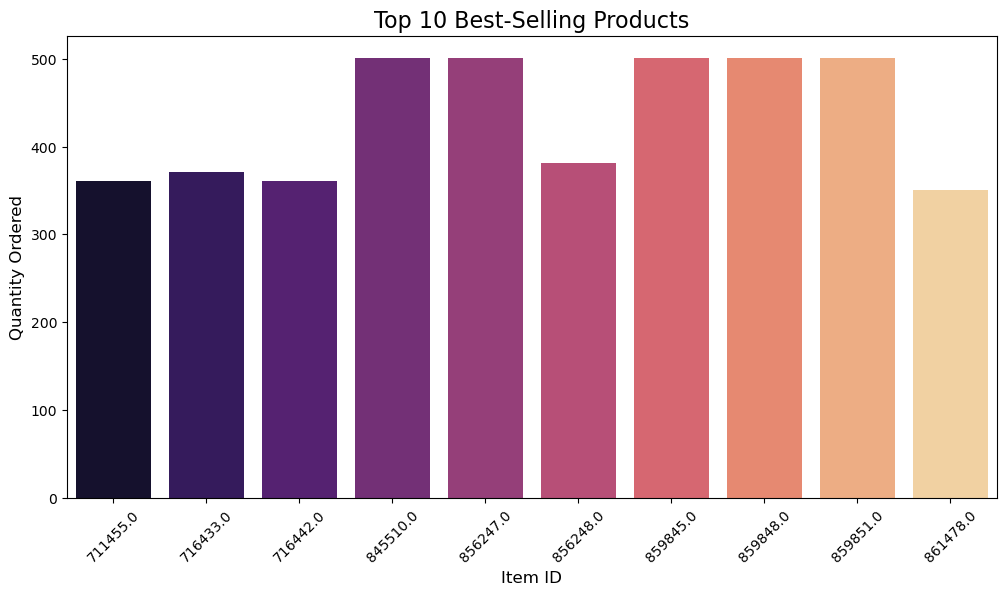

In [7]:
#  Top 10 Best-Selling Products
top_products = data.groupby('item_id')['qty_ordered'].sum().reset_index()
top_products = top_products.sort_values('qty_ordered', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='item_id', y='qty_ordered', palette='magma')
plt.title('Top 10 Best-Selling Products', fontsize=16)
plt.xlabel('Item ID', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)
plt.xticks(rotation=45)
plt.show()

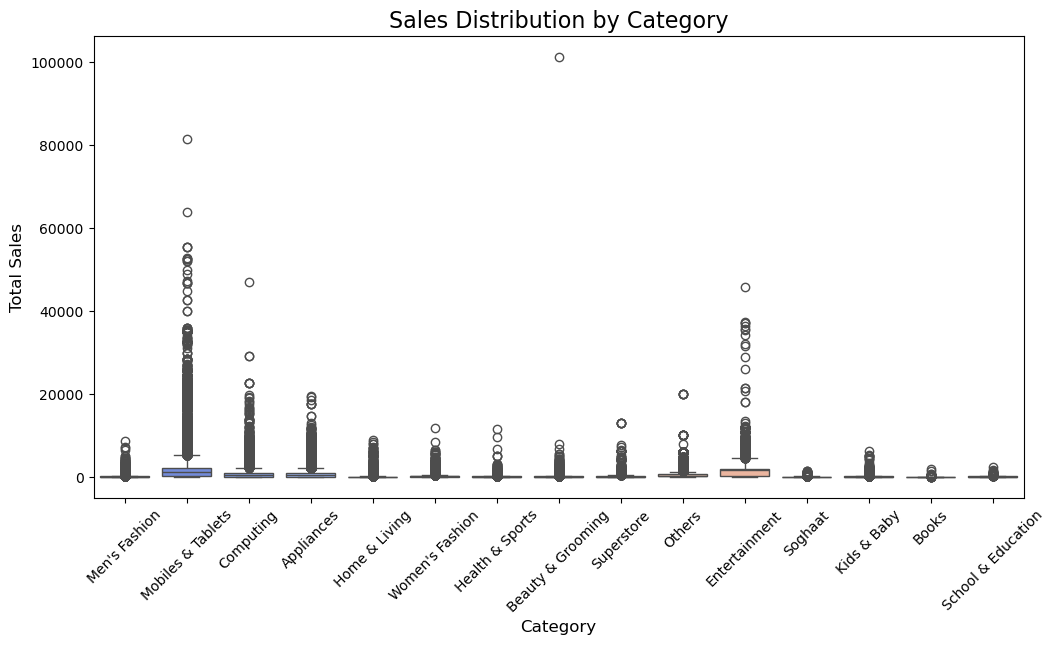

In [8]:
#  Sales Distribution by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='category', y='total', palette='coolwarm')
plt.title('Sales Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

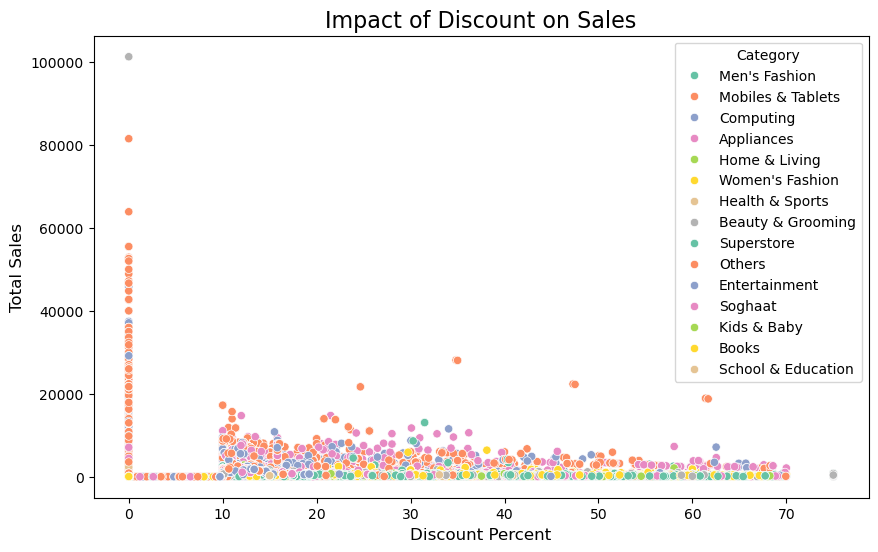

In [9]:
# Discount Impact on Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Discount_Percent', y='total', hue='category', palette='Set2')
plt.title('Impact of Discount on Sales', fontsize=16)
plt.xlabel('Discount Percent', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Category')
plt.show()

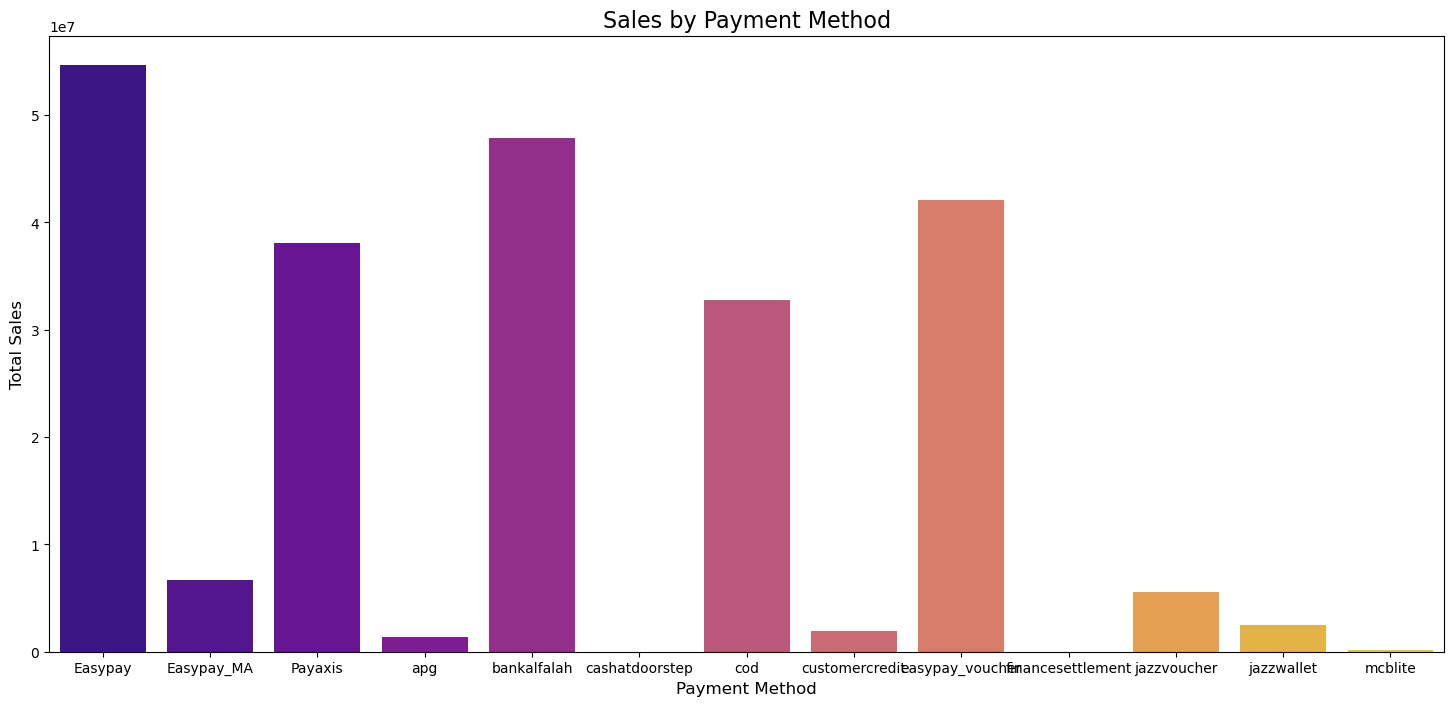

In [10]:
# Sales by Payment Method
sales_by_payment = data.groupby('payment_method')['total'].sum().reset_index()
plt.figure(figsize=(18, 8))
sns.barplot(data=sales_by_payment, x='payment_method', y='total', palette='plasma')
plt.title('Sales by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

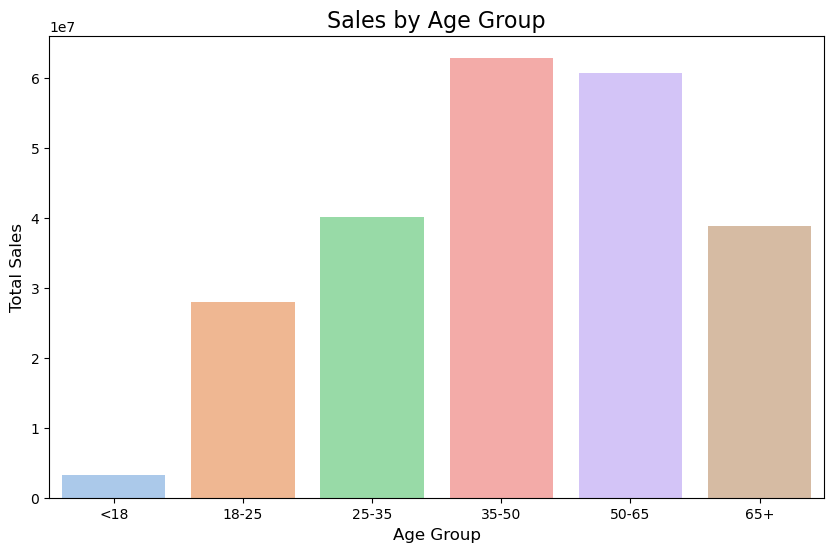

In [11]:
#  Age Group Analysis
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['<18', '18-25', '25-35', '35-50', '50-65', '65+']
data['Age Group'] = pd.cut(data['age'], bins=bins, labels=labels)
age_group_sales = data.groupby('Age Group')['total'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_sales, x='Age Group', y='total', palette='pastel')
plt.title('Sales by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

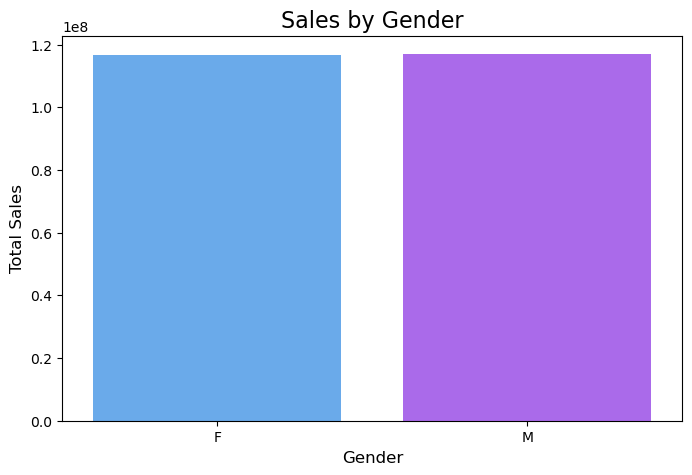

In [12]:
# Gender Analysis
sales_by_gender = data.groupby('Gender')['total'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_by_gender, x='Gender', y='total', palette='cool')
plt.title('Sales by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

<Figure size 1200x800 with 0 Axes>

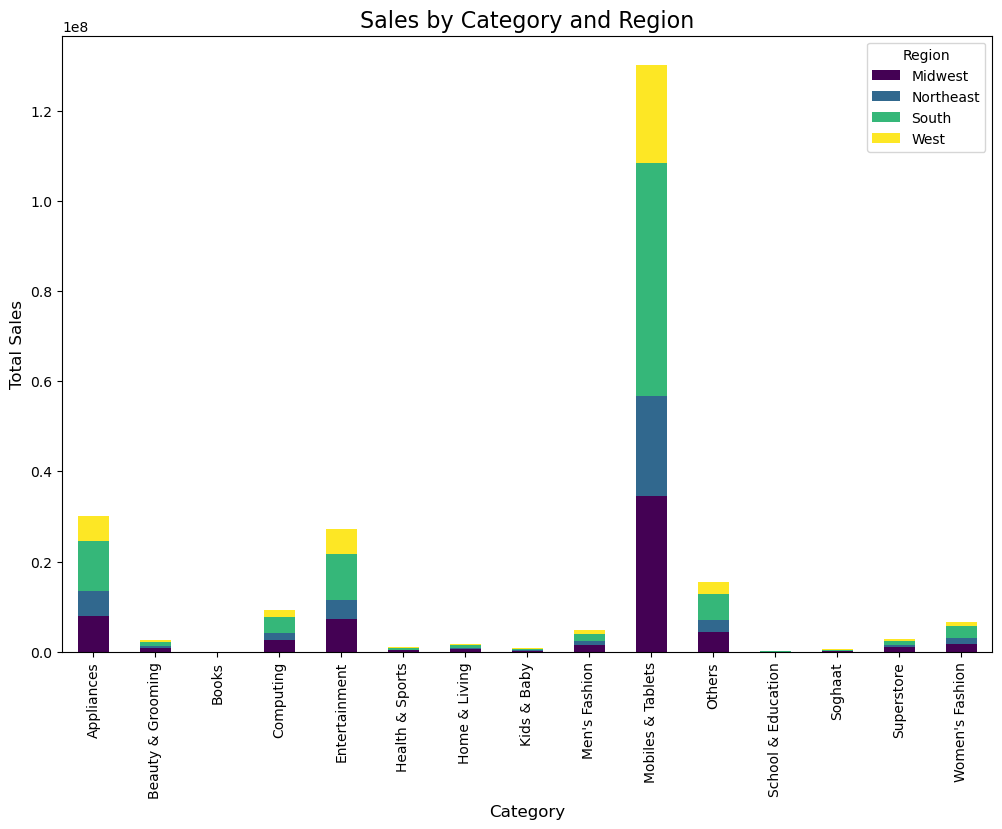

In [13]:
# Sales by Category and Region
category_region_sales = data.groupby(['category', 'Region'])['total'].sum().unstack()
plt.figure(figsize=(12, 8))
category_region_sales.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Sales by Category and Region', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Region')
plt.show()

### <i> Data Preprocessing </i>

In [14]:
# Handling Missing Values
# Drop rows with missing values in critical columns
data.dropna(subset=['order_id', 'order_date', 'status', 'item_id', 'qty_ordered', 'price', 'total'], inplace=True)

# Fill missing numeric values with 0
data.fillna({'discount_amount': 0, 'value': 0}, inplace=True)

# Fill missing categorical values with 'Unknown'
data.fillna({'category': 'Unknown', 'payment_method': 'Unknown', 'bi_st': 'Unknown'}, inplace=True)

# Convert columns to appropriate data types
data['order_date'] = pd.to_datetime(data['order_date'])
data['Customer Since'] = pd.to_datetime(data['Customer Since'], errors='coerce')
data['item_id'] = data['item_id'].astype('int64')
data['cust_id'] = data['cust_id'].astype('int64')
data['year'] = data['year'].astype('int64')
data['ref_num'] = data['ref_num'].astype('int64')
data['Zip'] = data['Zip'].astype('int64')

# Feature Engineering
# Add new features for analysis
data['Order Month-Year'] = data['order_date'].dt.to_period('M')
data['Order Weekday'] = data['order_date'].dt.day_name()
data['Customer Loyalty Duration'] = (pd.Timestamp.now() - data['Customer Since']).dt.days

# Correcting Invalid or Outlier Values
# Remove rows with negative or zero values in critical columns
data = data[(data['qty_ordered'] > 0) & (data['price'] > 0) & (data['total'] > 0)]

# Remove rows with unrealistic ages (e.g., age > 100 or age < 0)
data = data[(data['age'] > 0) & (data['age'] <= 100)]

# Normalize Numeric Columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_columns = ['qty_ordered', 'price', 'value', 'discount_amount', 'total', 'age', 'Discount_Percent']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['status', 'sku', 'category', 'payment_method', 'bi_st', 'Gender', 'Region']
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Remove Duplicates
data.drop_duplicates(inplace=True)

In [15]:
data

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,City,State,Zip,Region,User Name,Discount_Percent,Age Group,Order Month-Year,Order Weekday,Customer Loyalty Duration
0,100354678,2020-10-01,11,574772,47053,0.038076,0.000888,0.017756,0.0,0.017756,...,Vinson,OK,73571,2,jwtitus,0.0,35-50,2020-10,Thursday,6725
1,100354678,2020-10-01,11,574774,12121,0.018036,0.000188,0.001876,0.0,0.001876,...,Vinson,OK,73571,2,jwtitus,0.0,35-50,2020-10,Thursday,6725
2,100354680,2020-10-01,3,574777,46974,0.014028,0.001480,0.011842,0.0,0.011842,...,Vinson,OK,73571,2,jwtitus,0.0,35-50,2020-10,Thursday,6725
3,100354680,2020-10-01,3,574779,47052,0.014028,0.000789,0.006312,0.0,0.006312,...,Vinson,OK,73571,2,jwtitus,0.0,35-50,2020-10,Thursday,6725
4,100367357,2020-11-13,11,595185,30532,0.000000,0.000986,0.000986,0.0,0.000986,...,Vinson,OK,73571,2,jwtitus,0.0,35-50,2020-11,Friday,6725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286387,100562365,2021-09-30,6,905179,852,0.000000,0.043648,0.043648,0.0,0.043648,...,Rushville,NY,14544,1,bklatham,0.0,50-65,2021-09,Thursday,6514
286388,100562376,2021-09-30,2,905191,27286,0.000000,0.000394,0.000394,0.0,0.000394,...,Lawrenceville,GA,30044,2,bmbrunetti,0.0,50-65,2021-09,Thursday,4836
286389,100562383,2021-09-30,2,905200,46147,0.000000,0.000395,0.000395,0.0,0.000395,...,Durham,NC,27701,2,fngiusti,0.0,35-50,2021-09,Thursday,13693
286390,100562384,2021-09-30,2,905202,44051,0.000000,0.000493,0.000493,0.0,0.000493,...,Durham,NC,27701,2,fngiusti,0.0,35-50,2021-09,Thursday,13693


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### <i> Modeling </i>
### <i> Logistic Regression </i>

In [17]:
# Feature Selection
X = data[['qty_ordered', 'price', 'value', 'discount_amount', 'total', 'age', 'Discount_Percent']]
y = data['status']  # Replace 'status' with your target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

Logistic Regression Results:
Accuracy: 0.37540848654177167
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.85      0.52     30427
           1       0.00      0.00      0.00        54
           2       0.00      0.00      0.00       857
           3       0.38      0.16      0.22     25551
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00      7268
           6       0.00      0.00      0.00       216
           7       0.00      0.00      0.00        21
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         9
          11       0.36      0.00      0.01     14680
          12       0.00      0.00      0.00      1068

    accuracy                           0.38     80174
   macro avg       0.09      0.08      0.06     80174
weighted avg       0.33      0.38      0.27     801

### <i> Random Forest </i>

In [18]:
# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier Results:
Accuracy: 0.5017711477536358
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.64      0.60     30427
           1       0.27      0.17      0.21        54
           2       0.13      0.07      0.09       857
           3       0.51      0.55      0.53     25551
           4       0.29      0.25      0.27         8
           5       0.29      0.20      0.24      7268
           6       0.22      0.09      0.13       216
           7       0.20      0.05      0.08        21
           8       0.14      0.08      0.10        13
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         9
          11       0.41      0.35      0.38     14680
          12       0.13      0.07      0.09      1068

    accuracy                           0.50     80174
   macro avg       0.24      0.19      0.21     80174
weighted avg       0.49      0.50      0.49   

### <i> Gradient Boosting Classifier </i>

In [19]:
# 3. Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("\nGradient Boosting Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Classifier Results:
Accuracy: 0.4738069698405967
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.60      0.57     30427
           1       0.13      0.06      0.08        54
           2       0.17      0.00      0.01       857
           3       0.42      0.63      0.51     25551
           4       0.00      0.00      0.00         8
           5       0.60      0.02      0.04      7268
           6       0.17      0.04      0.06       216
           7       0.11      0.05      0.07        21
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         9
          11       0.41      0.23      0.29     14680
          12       0.38      0.01      0.01      1068

    accuracy                           0.47     80174
   macro avg       0.23      0.13      0.13     80174
weighted avg       0.48      0.47      0.4

### <i> Comparison Of ALL Models </i>

In [20]:
# Compare the models based on accuracy
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
gb_accuracy = accuracy_score(y_test, y_pred_gb)

# Store accuracies in a dictionary
model_comparison = {
    "Logistic Regression": logistic_accuracy,
    "Random Forest": rf_accuracy,
    "Gradient Boosting": gb_accuracy
}

# Find the best model
best_model = max(model_comparison, key=model_comparison.get)

# Print the comparison
print("\nModel Comparison:")
for model, accuracy in model_comparison.items():
    print(f"{model}: {accuracy:.4f}")

print(f"\nThe best model is: {best_model} with an accuracy of {model_comparison[best_model]:.4f}")



Model Comparison:
Logistic Regression: 0.3754
Random Forest: 0.5018
Gradient Boosting: 0.4738

The best model is: Random Forest with an accuracy of 0.5018


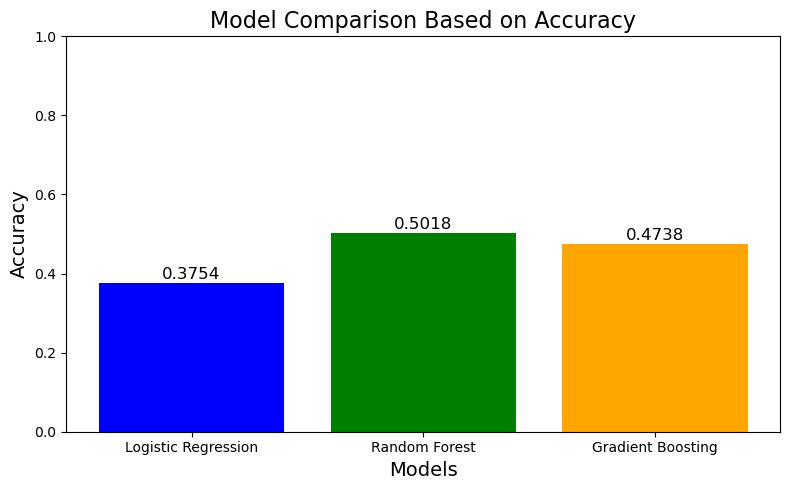

In [21]:
import matplotlib.pyplot as plt

# Prepare data for visualization
model_names = list(model_comparison.keys())
accuracies = list(model_comparison.values())

# Plot the accuracies
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.title("Model Comparison Based on Accuracy", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

# Annotate the accuracy values on the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.4f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()
